<a href="https://colab.research.google.com/github/sharadyadav-ai/python-projets/blob/main/AMAZONE_FINE_FOOD_REVIEW_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.shape

(568454, 10)

In [ ]:
df=df.head(1000)

In [ ]:
df['Score']

,Score
0,5
1,1
2,4
3,2
4,5
...,...
995,5
996,5
997,5
998,1


Text(0, 0.5, 'Count of the number of people')

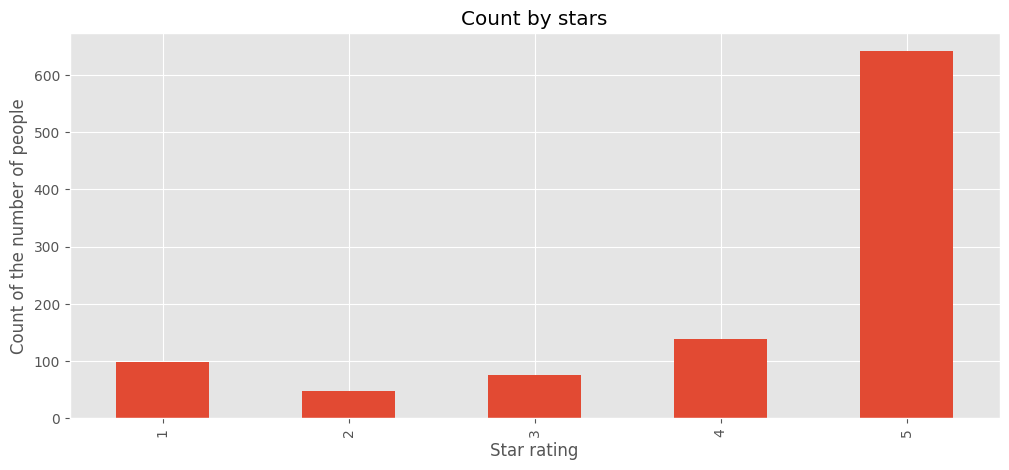

In [ ]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',title="Count by stars",figsize=(12,5))
ax.set_xlabel("Star rating")
ax.set_ylabel("Count of the number of people")

In [ ]:
example=df['Text'][50]
print(example)
nltk.download('punkt_tab')

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
tokens=nltk.word_tokenize(example)
print(tokens)
tokens[:10]
nltk.download('averaged_perceptron_tagger_eng')

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:

nltk.pos_tag(tokens)
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
entities=nltk.chunk.ne_chunk(nltk.pos_tag(tokens))
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia.polarity_scores('I am going to USA')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [ ]:
res={}
for i,rows in tqdm(df.iterrows(),total=len(df)):
  text=rows['Text']
  myid=rows['Id']
  res[myid]=sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [ ]:
  vaders=pd.DataFrame(res).T

In [ ]:
vaders= vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')

In [ ]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


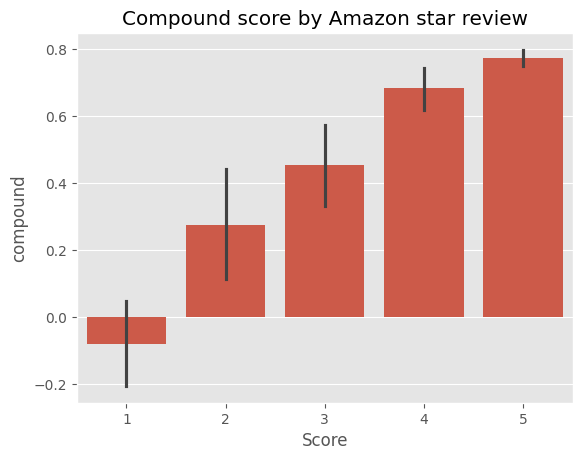

In [ ]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compound score by Amazon star review')
plt.show()

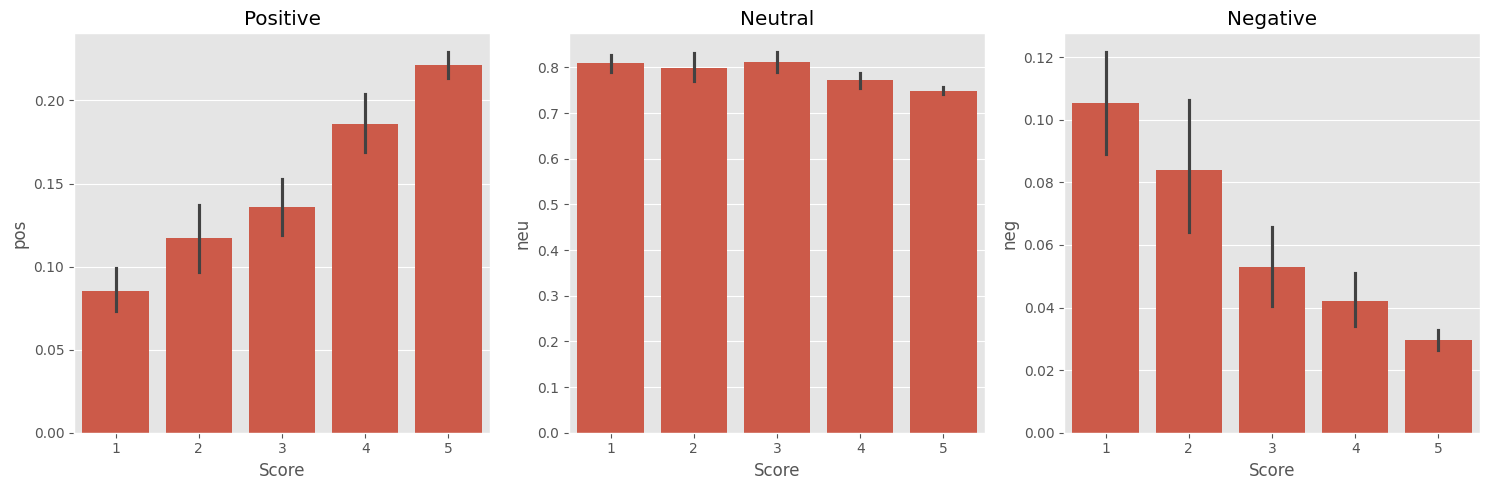

In [ ]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
def polarity_scores_roberta(example):

  encoded_text=tokenizer(example,return_tensors='pt')
  output=model(**encoded_text)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={

    'roberta_neg':scores[0],

    'roberta_neu':scores[1],

    'roberta_pos':scores[2]

  }
  return scores_dict

In [ ]:
res={}
for i,rows in tqdm(df.iterrows(),total=len(df)):
  try:
    text=rows['Text']
    myid=rows['Id']
    vader_result=sia.polarity_scores(text)
    vader_result_rename={}
    for key,value in vader_result.items():
      vader_result_rename[f"vader_{key}"]=value

    roberta_result=polarity_scores_roberta(text)
    both={**vader_result_rename,**roberta_result}
    res[myid]=both
  except RuntimeError:
    print(f'Broke for id{myid}')



  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id83
Broke for id187
Broke for id529
Broke for id540
Broke for id746
Broke for id863


In [ ]:
print(res)

{1: {'vader_neg': 0.0, 'vader_neu': 0.695, 'vader_pos': 0.305, 'vader_compound': 0.9441, 'roberta_neg': np.float32(0.009624226), 'roberta_neu': np.float32(0.049980387), 'roberta_pos': np.float32(0.94039536)}, 2: {'vader_neg': 0.138, 'vader_neu': 0.862, 'vader_pos': 0.0, 'vader_compound': -0.5664, 'roberta_neg': np.float32(0.50898606), 'roberta_neu': np.float32(0.45241356), 'roberta_pos': np.float32(0.038600385)}, 3: {'vader_neg': 0.091, 'vader_neu': 0.754, 'vader_pos': 0.155, 'vader_compound': 0.8265, 'roberta_neg': np.float32(0.0032289), 'roberta_neu': np.float32(0.09806742), 'roberta_pos': np.float32(0.8987037)}, 4: {'vader_neg': 0.0, 'vader_neu': 1.0, 'vader_pos': 0.0, 'vader_compound': 0.0, 'roberta_neg': np.float32(0.002295126), 'roberta_neu': np.float32(0.09021924), 'roberta_pos': np.float32(0.9074856)}, 5: {'vader_neg': 0.0, 'vader_neu': 0.552, 'vader_pos': 0.448, 'vader_compound': 0.9468, 'roberta_neg': np.float32(0.0016347291), 'roberta_neu': np.float32(0.0103024645), 'roberta

In [ ]:
result_df=pd.DataFrame(res).T

In [ ]:
result_df.head()

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395
2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600
3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704
4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486
5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063


In [ ]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns={'index': 'Id'})
result_df = result_df.rename(columns={col: f"{col}_vader_roberta" for col in result_df.columns if col not in ['Id']})
# performing the join operation
final_df = df.merge(result_df.set_index('Id'), on='Id', how='left')

In [ ]:
final_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,vader_neg_vader_roberta,vader_neu_vader_roberta,vader_pos_vader_roberta,vader_compound_vader_roberta,roberta_neg_vader_roberta,roberta_neu_vader_roberta,roberta_pos_vader_roberta
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063


In [ ]:
final_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'vader_neg_vader_roberta', 'vader_neu_vader_roberta',
       'vader_pos_vader_roberta', 'vader_compound_vader_roberta',
       'roberta_neg_vader_roberta', 'roberta_neu_vader_roberta',
       'roberta_pos_vader_roberta'],
      dtype='object')

In [ ]:
sns.pairplot(data=final_df,
             vars=['vader_neg_vader_roberta', 'vader_neu_vader_roberta',
       'vader_pos_vader_roberta',
       'roberta_neg_vader_roberta', 'roberta_neu_vader_roberta',
       'roberta_pos_vader_roberta'],
             hue='Score',
             palette='tab10')
plt.show()

In [ ]:
final_df.query('Score==1').sort_values('roberta_pos_vader_roberta',ascending=False)

In [ ]:
final_df.query('Score==1')\
.sort_values('roberta_pos_vader_roberta',ascending=False)['Text'].values[0]

In [ ]:
  from transformers import pipeline
  sent_pipeline=pipeline("sentiment-analysis")

OUtput validation


In [ ]:
sent_pipeline('I am very happy')

[{'label': 'POSITIVE', 'score': 0.9998795986175537}]

Correlation Matrix:
                           vader_neg_vader_roberta  vader_neu_vader_roberta  \
vader_neg_vader_roberta                   1.000000                -0.195772   
vader_neu_vader_roberta                  -0.195772                 1.000000   
vader_pos_vader_roberta                  -0.339192                -0.856103   
roberta_neg_vader_roberta                 0.543885                 0.207668   
roberta_neu_vader_roberta                 0.141859                 0.380567   
roberta_pos_vader_roberta                -0.504430                -0.328618   

                           vader_pos_vader_roberta  roberta_neg_vader_roberta  \
vader_neg_vader_roberta                  -0.339192                   0.543885   
vader_neu_vader_roberta                  -0.856103                   0.207668   
vader_pos_vader_roberta                   1.000000                  -0.485949   
roberta_neg_vader_roberta                -0.485949                   1.000000   
roberta_neu_vader_rob

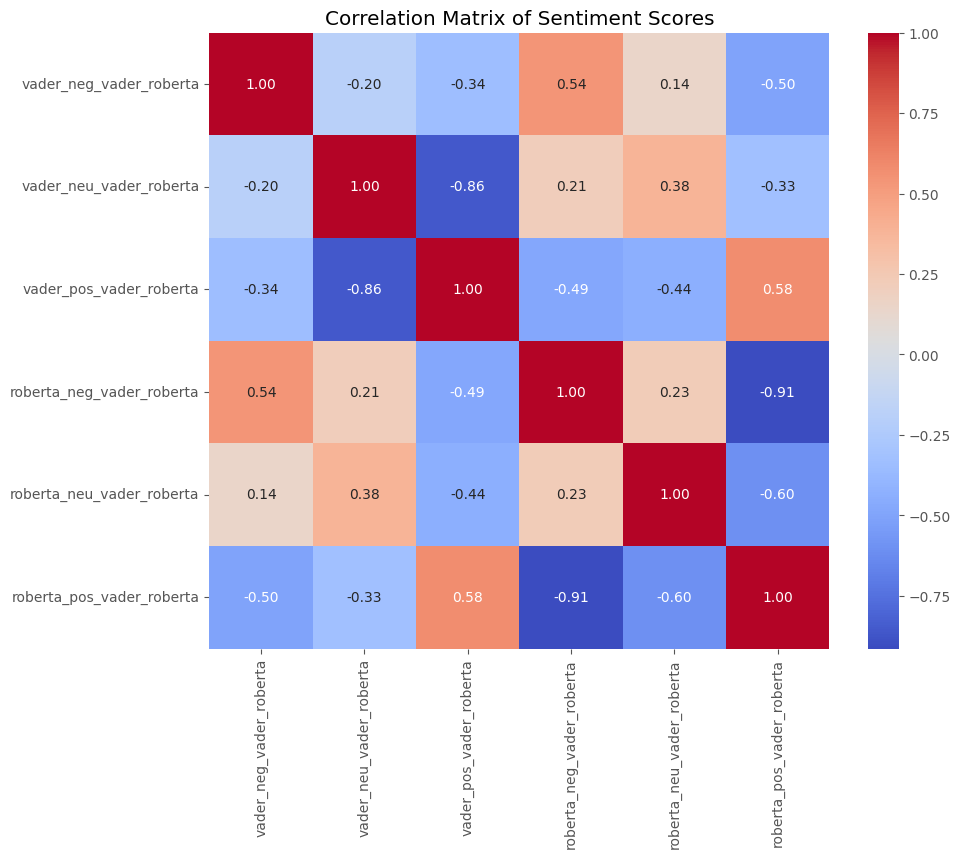


Descriptive Statistics:


,vader_neg_vader_roberta,vader_neu_vader_roberta,vader_pos_vader_roberta,roberta_neg_vader_roberta,roberta_neu_vader_roberta,roberta_pos_vader_roberta
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.043008,0.765148,0.191840,0.156764,0.122825,0.720411
std,0.056796,0.103382,0.107778,0.291259,0.148235,0.355728
min,0.000000,0.355000,0.000000,0.000912,0.004811,0.002235
25%,0.000000,0.699250,0.120000,0.002235,0.017362,0.508538
50%,0.025500,0.774000,0.179500,0.007884,0.050246,0.931034
75%,0.066000,0.837750,0.256000,0.108586,0.174840,0.980612
max,0.365000,1.000000,0.645000,0.981972,0.868599,0.993715
